In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/winequality.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(6497, 13)

### check for missing values and delete missing observations

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.shape

(6463, 13)

In [8]:
df.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [9]:
# code the values of wine, white:1 red:0
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]

In [10]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white_wine
924,white,7.9,0.28,0.41,2.0,0.044,50.0,152.0,0.99340,3.45,0.49,10.7,8,1
4242,white,5.9,0.22,0.29,4.2,0.037,69.0,144.0,0.99214,3.13,0.74,10.8,7,1
6159,red,6.3,1.02,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2,4,0
3543,white,6.0,0.33,0.20,1.8,0.031,49.0,159.0,0.99190,3.41,0.53,11.0,6,1
4024,white,6.0,0.28,0.27,4.1,0.046,50.0,147.0,0.99126,3.27,0.56,11.6,6,1


In [11]:
df.drop('type', axis=1, inplace=True)

In [12]:
df.quality.value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [14]:
# encoding quality feature by considering quality of 6 = good and less than 6 as bad
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop('quality', axis=1, inplace=True)

### Splitting training and test sets

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


### scaling the data

In [17]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine
459,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000,1
1460,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000,1
4403,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,1
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000,1
4317,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000,1


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled[:3]

array([[-0.86265684,  0.56588915,  0.22079121,  0.75048207,  0.07674805,
         2.9415276 ,  2.35882933,  0.788386  ,  0.94784355, -0.20357893,
        -1.66472797,  0.57094748],
       [ 0.99186667, -1.02945526,  2.92098728, -0.3929423 , -0.17512717,
        -0.08344183,  0.21383119, -0.64578381,  0.38700578, -0.87653487,
         1.63149383,  0.57094748],
       [-1.55810316, -0.72265826,  0.98238498,  0.14758559,  0.27265101,
         0.5887736 ,  1.25973937, -0.37229096, -0.17383198, -0.74194369,
        -0.62233304,  0.57094748]])

### Model training

There are three things to consider:

1. Layer structure
2. Loss function (binary cross entropy = for binary classes, categorical cross entropy = for multiple classes)
3. Class balance

In [21]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [24]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.7137 - precision: 0.7462 - recall: 0.8317
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7350 - precision: 0.7569 - recall: 0.8579
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7466 - precision: 0.7691 - recall: 0.8582
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7528 - precision: 0.7871 - recall: 0.8366
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7503 - precision: 0.7794 - recall: 0.8457
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7559 - precision: 0.7881 - recall: 0.8415
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7567 - precision: 0.8067 - recall: 0.8107
Epoch 8/100
162/162 [=============

### Visualizing model performance

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

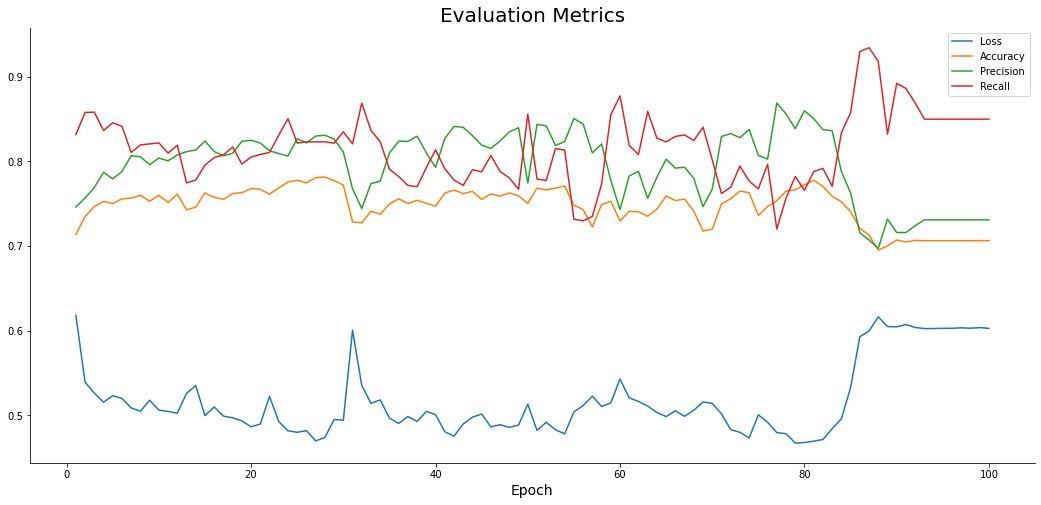

In [26]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Evaluation Metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

### Prediction

In [27]:
predictions = model.predict(X_test_scaled)

In [28]:
predictions

array([[0.71682346],
       [0.71682346],
       [0.71682346],
       ...,
       [0.71682346],
       [0.71682346],
       [0.36906493]], dtype=float32)

In [29]:
predictions_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

In [31]:
predictions_classes[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions_classes))

[[205 277]
 [128 683]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, predictions_classes):.2f}')
print(f'Precision: {precision_score(y_test, predictions_classes):.2f}')
print(f'Recall: {recall_score(y_test, predictions_classes):.2f}')

Accuracy: 0.69
Precision: 0.71
Recall: 0.84
